In [103]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_confusion_matrix,roc_curve

import warnings
warnings.filterwarnings('ignore')

# Problem Statement

In [ ]:
To predicting whether patient has a heart disease or not by using various features

# Data Gathering

In [104]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Exploratorary Data Analysis

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [106]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# age         

In [107]:
df['age']

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

In [108]:
df['age'].value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
60    11
44    11
56    11
64    10
41    10
63     9
67     9
65     8
43     8
45     8
55     8
42     8
61     8
53     8
46     7
48     7
66     7
50     7
49     5
47     5
70     4
39     4
35     4
68     4
38     3
71     3
40     3
69     3
34     2
37     2
29     1
74     1
76     1
77     1
Name: age, dtype: int64

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# sex         

In [110]:
df['sex']

0      1
1      1
2      0
3      1
4      0
      ..
298    0
299    1
300    1
301    1
302    0
Name: sex, Length: 303, dtype: int64

In [111]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [112]:
df['sex'].value_counts().to_dict()

{1: 207, 0: 96}

In [113]:
sex_dict = {'male':1, 'female':0}
sex_dict

{'male': 1, 'female': 0}

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# cp         

In [115]:
df['cp']

0      3
1      2
2      1
3      1
4      0
      ..
298    0
299    3
300    0
301    0
302    1
Name: cp, Length: 303, dtype: int64

In [116]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [117]:
df['cp'].value_counts().to_dict()

{0: 143, 2: 87, 1: 50, 3: 23}

In [118]:
cp_dict = {'typical angina':0,'atypical angina':1,'non-anginal pain':2,'asymptomatic':3}
cp_dict

{'typical angina': 0,
 'atypical angina': 1,
 'non-anginal pain': 2,
 'asymptomatic': 3}

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# trestbps

In [120]:
df['trestbps']

0      145
1      130
2      130
3      120
4      120
      ... 
298    140
299    110
300    144
301    130
302    130
Name: trestbps, Length: 303, dtype: int64

In [121]:
df['trestbps'].value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
160    11
125    11
112     9
132     8
118     7
124     6
135     6
108     6
152     5
134     5
145     5
122     4
170     4
100     4
105     3
126     3
115     3
180     3
136     3
142     3
102     2
148     2
178     2
94      2
144     2
146     2
200     1
114     1
154     1
123     1
192     1
174     1
165     1
104     1
117     1
101     1
156     1
106     1
155     1
129     1
172     1
164     1
Name: trestbps, dtype: int64

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# chol

In [123]:
df['chol']

0      233
1      250
2      204
3      236
4      354
      ... 
298    241
299    264
300    193
301    131
302    236
Name: chol, Length: 303, dtype: int64

In [124]:
df['chol'].value_counts()

204    6
197    6
234    6
269    5
254    5
      ..
284    1
224    1
167    1
276    1
131    1
Name: chol, Length: 152, dtype: int64

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# fbs

In [126]:
df['fbs']

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64

In [127]:
df['fbs'].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [128]:
df['fbs'].value_counts().to_dict()

{0: 258, 1: 45}

In [129]:
fbs_dict = {'lower':0, 'higher':1}
fbs_dict

{'lower': 0, 'higher': 1}

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# restecg

In [131]:
df['restecg']

0      0
1      1
2      0
3      1
4      1
      ..
298    1
299    1
300    1
301    1
302    0
Name: restecg, Length: 303, dtype: int64

In [132]:
df['restecg'].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [133]:
df['restecg'].value_counts().to_dict()

{1: 152, 0: 147, 2: 4}

In [213]:
restecg_dict = {'mediumhyper':0,'hyper':1,'lowhyper':2}
restecg_dict

{'mediumhyper': 0, 'hyper': 1, 'lowhyper': 2}

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# thalach

In [215]:
df['thalach']

0      150
1      187
2      172
3      178
4      163
      ... 
298    123
299    132
300    141
301    115
302    174
Name: thalach, Length: 303, dtype: int64

In [216]:
df['thalach'].value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# exang

In [218]:
df['exang']

0      0
1      0
2      0
3      0
4      1
      ..
298    1
299    0
300    0
301    1
302    0
Name: exang, Length: 303, dtype: int64

In [219]:
df['exang'].value_counts()

0    204
1     99
Name: exang, dtype: int64

In [220]:
df['exang'].value_counts().to_dict()

{0: 204, 1: 99}

In [221]:
exang_dict = {'no':0,'yes':1}
exang_dict

{'no': 0, 'yes': 1}

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# oldpeak

In [223]:
df['oldpeak']

0      2.3
1      3.5
2      1.4
3      0.8
4      0.6
      ... 
298    0.2
299    1.2
300    3.4
301    1.2
302    0.0
Name: oldpeak, Length: 303, dtype: float64

In [224]:
df['oldpeak'].value_counts()

0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: oldpeak, dtype: int64

In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# slope

In [226]:
df['slope']

0      0
1      0
2      2
3      2
4      2
      ..
298    1
299    1
300    1
301    1
302    1
Name: slope, Length: 303, dtype: int64

In [227]:
df['slope'].value_counts()

2    142
1    140
0     21
Name: slope, dtype: int64

In [228]:
df['slope'].value_counts().to_dict()

{2: 142, 1: 140, 0: 21}

In [229]:
slope_dict = {'up':0,'flat':1,'down':2}
slope_dict

{'up': 0, 'flat': 1, 'down': 2}

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# ca 

In [231]:
df['ca']

0      0
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    2
301    1
302    1
Name: ca, Length: 303, dtype: int64

In [232]:
df['ca'].value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [233]:
df['ca'].value_counts().to_dict()

{0: 175, 1: 65, 2: 38, 3: 20, 4: 5}

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# thal

In [235]:
df['thal']

0      1
1      2
2      2
3      2
4      2
      ..
298    3
299    3
300    3
301    3
302    2
Name: thal, Length: 303, dtype: int64

In [236]:
df['thal'].value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [237]:
df['thal'].value_counts().to_dict()

{2: 166, 3: 117, 1: 18, 0: 2}

In [238]:
thal_dict = {'nothing': 3, 'normal':2,'fixed defect':1,'reversable defect':0}
thal_dict

{'nothing': 3, 'normal': 2, 'fixed defect': 1, 'reversable defect': 0}

In [239]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Model Training

In [240]:
x = df.drop('target',axis = 1)
y = df['target']

In [241]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=1,stratify =y)

In [242]:
model = LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

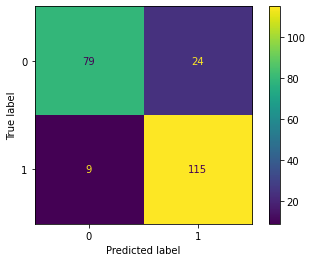

In [243]:
# Training Data
plot_confusion_matrix(model, x_train, y_train)

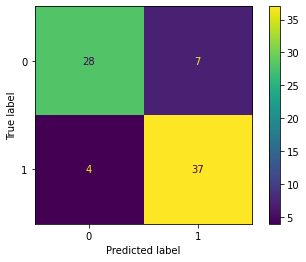

In [244]:
# Testing Data
plot_confusion_matrix(model, x_test, y_test)

In [245]:
# Training Accuracy
model.score(x_train, y_train)

0.8546255506607929

In [246]:
# Testing Accuracy
model.score(x_test, y_test)

0.8552631578947368

# Model Evaluation

In [247]:
# prediction
y_pred = model.predict(x_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1], dtype=int64)

In [248]:
# prediction probability
y_pred_proba = model.predict_proba(x_test)
y_pred_proba

array([[0.29105631, 0.70894369],
       [0.71272654, 0.28727346],
       [0.98715866, 0.01284134],
       [0.89569316, 0.10430684],
       [0.70361722, 0.29638278],
       [0.21258233, 0.78741767],
       [0.93073456, 0.06926544],
       [0.26050803, 0.73949197],
       [0.900725  , 0.099275  ],
       [0.17101381, 0.82898619],
       [0.80013698, 0.19986302],
       [0.75269952, 0.24730048],
       [0.06351868, 0.93648132],
       [0.94818222, 0.05181778],
       [0.60832018, 0.39167982],
       [0.32350878, 0.67649122],
       [0.98472131, 0.01527869],
       [0.17431472, 0.82568528],
       [0.16437889, 0.83562111],
       [0.1915568 , 0.8084432 ],
       [0.41227064, 0.58772936],
       [0.07244514, 0.92755486],
       [0.93881679, 0.06118321],
       [0.31755583, 0.68244417],
       [0.98755278, 0.01244722],
       [0.91531613, 0.08468387],
       [0.94497675, 0.05502325],
       [0.33080292, 0.66919708],
       [0.23756012, 0.76243988],
       [0.06538538, 0.93461462],
       [0.

In [249]:
# Testing data

cnf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*45)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:",accuracy)
print("*"*45)

clf_report = classification_report(y_test, y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[28  7]
 [ 4 37]]
*********************************************
Accuracy Score: 0.8552631578947368
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.80      0.84        35
           1       0.84      0.90      0.87        41

    accuracy                           0.86        76
   macro avg       0.86      0.85      0.85        76
weighted avg       0.86      0.86      0.85        76



In [250]:
# prediction
y_pred_train = model.predict(x_train)

In [251]:
# Training data

cnf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*45)

# Visualization

accuracy = accuracy_score(y_train, y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*45)


clf_report = classification_report(y_train, y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[ 79  24]
 [  9 115]]
*********************************************
Accuracy Score: 0.8546255506607929
*********************************************
Classification report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83       103
           1       0.83      0.93      0.87       124

    accuracy                           0.85       227
   macro avg       0.86      0.85      0.85       227
weighted avg       0.86      0.85      0.85       227



# AUC-ROC Curve

In [252]:
# prediction probability
y_pred_proba = model.predict_proba(x_train)
y_pred_proba[:,1]

array([0.67567472, 0.14325876, 0.33513213, 0.66174873, 0.70798718,
       0.94571727, 0.92754112, 0.73356653, 0.01298907, 0.88079081,
       0.70894788, 0.88470181, 0.08262862, 0.82647272, 0.78610231,
       0.71520988, 0.91611934, 0.92833595, 0.87696677, 0.46925365,
       0.70634159, 0.00213569, 0.69225218, 0.93953979, 0.32771952,
       0.00429764, 0.98530818, 0.82840949, 0.06410386, 0.03031858,
       0.90815372, 0.91875081, 0.15997206, 0.92788896, 0.67054851,
       0.97882675, 0.6413702 , 0.96692454, 0.67067727, 0.13411165,
       0.00724332, 0.76475662, 0.96397211, 0.90705016, 0.54246016,
       0.50568016, 0.86112924, 0.7818385 , 0.48344317, 0.54728639,
       0.91527362, 0.08709362, 0.96606685, 0.09552624, 0.83013792,
       0.98057374, 0.78087136, 0.96719456, 0.88150679, 0.96496642,
       0.23420426, 0.65410307, 0.94442789, 0.43115337, 0.00370097,
       0.03557148, 0.8290347 , 0.36575393, 0.88054265, 0.96139811,
       0.42527002, 0.87934904, 0.92742331, 0.56213797, 0.61987

In [198]:
fpr, tpr, thresh = roc_curve(y_train, y_pred_proba[:,1])

Text(0.5, 1.0, 'Reciever Operating Characteristics')

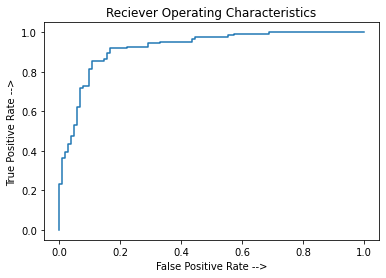

In [253]:
# Plot AUC-ROC
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate -->")
plt.ylabel("True Positive Rate -->")
plt.title("Reciever Operating Characteristics")

# Training on single row

In [254]:
x.head(1).T

,0
age,63.0
sex,1.0
cp,3.0
trestbps,145.0
chol,233.0
fbs,1.0
restecg,0.0
thalach,150.0
exang,0.0
oldpeak,2.3


In [255]:
x.head(1).T.shape

(13, 1)

In [256]:
columns = x.columns
print(columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')


In [257]:
len(columns)

13

In [258]:
# user intput
age = 63
sex = 'male'
cp = 'typical angina'
trestbps= 145
chol = 233
fbs = 'lower'
restecg = 'mediumhyper'
thalach = 150
exang = 'no'
oldpeak = 2.3
slope = 'up'
ca = 1
thal = 'normal'

In [179]:
columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [259]:
array = np.zeros(columns.shape[0],dtype = int)
array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [260]:
array = np.zeros(columns.shape[0],dtype = int)
array[0] = age
array[1] = sex_dict[sex]
array[2] = cp_dict[cp]
array[3] = trestbps
array[4] = chol
array[5] = fbs_dict[fbs]
array[6] = restecg_dict[restecg]
array[7] = thalach
array[8] = exang_dict[exang]
array[9] = oldpeak
array[10] = slope_dict[slope]
array[11] = ca
array[12] = thal_dict[thal]

array

array([ 63,   1,   0, 145, 233,   0,   0, 150,   0,   2,   0,   1,   2])

In [261]:
predicted_disease = model.predict([array])[0]
if predicted_disease == 1:
    print('yes patient has a heart disease')
else:
    print('patient has not a heart disease')

patient has not a heart disease


In [262]:
data  = {"sex_dict":sex_dict,"cp_dict":cp_dict,
                       "fbs_dict":fbs_dict,"restecg_dict":restecg_dict,
                       "exang_dict":exang_dict,"slope_dict":slope_dict,
                    'thal_dict':thal_dict,"columns":list(columns)}
data

{'sex_dict': {'male': 1, 'female': 0},
 'cp_dict': {'typical angina': 0,
  'atypical angina': 1,
  'non-anginal pain': 2,
  'asymptomatic': 3},
 'fbs_dict': {'lower': 0, 'higher': 1},
 'restecg_dict': {'mediumhyper': 0, 'hyper': 1, 'lowhyper': 2},
 'exang_dict': {'no': 0, 'yes': 1},
 'slope_dict': {'up': 0, 'flat': 1, 'down': 2},
 'thal_dict': {'nothing': 3,
  'normal': 2,
  'fixed defect': 1,
  'reversable defect': 0},
 'columns': ['age',
  'sex',
  'cp',
  'trestbps',
  'chol',
  'fbs',
  'restecg',
  'thalach',
  'exang',
  'oldpeak',
  'slope',
  'ca',
  'thal']}

In [263]:
import json

with open("data.json", "w") as f:
    json.dump(heart_data, f)

In [264]:
# Save Model in Pickle File
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(heart_model, f)